# Web scraping in Python: Scraping with Requests and BeautifulSoup

Web scraping is a valuable tool for programmers to effortlessly gather information from the vast resources of the internet. While it is generally acceptable for non-commercial purposes with publicly available data, caution should be taken to avoid scraping protected information such as personal data, intellectual property, or confidential information. 

Additionally, the complexities of scraping social media due to its varying levels of accessibility highlight the need for cautious and informed scraping practices.


This coffee and coding session, we will focus to use Python's two libraries; <b>Requests</b> and <b>BeautifulSoup</b>. <br>http://books.toscrape.com/ contains review  for fake books for the beginners learning web scrapings. <br>
This session aims for the beginners (like me!) introduction to web scraping.

To gather information from the internet through web scraping, one typically follows a four-step process:

<li> Sending an HTTP GET request to the URL </li>
<li> Retrieving HTML (Hypertext Markup Language) content </li>
<li> Building the HTML document tree </li>
<li> Extracting information from the HTML document tree </li>   

### Requests


The Requests library in Python is a popular and widely used library for making HTTP requests. This library allows user to send HTTP requests to server, receive response and handle in a simple and efficient manner. 

It supports varous methods for making requests, such as GET, POST, HEAD, PUT, DELETE etc.

### BeautifulSoup

BeautifulSoup is a Python library for web scraping and data extraction from HTML and XML files. <br>
It provides a convenient and efficient way to parse and naviage through HTML contents, allowing for the extraction of specific elements and data.

<b>Resource: https://www.crummy.com/software/BeautifulSoup/bs4/doc/ </b> 

We will first fetch HTML code from our fake-books site. But before we start, I will show you a very quick overview of basic HTML. 

HTML is a standard markup language used for creating web pages and other information that can be displayed in a web browser. It consists of a set of tags and attributes that define the structure, content, and appearance of a web page. 

In [31]:
from IPython.core.display import HTML

In [32]:
html_test = """
<html>
  <head>
    <title>My First Web Page</title>
  </head>
  <body>
    <h1>Welcome to my first test web page</h1>
    <p>This is a paragraph of text. I want to list some of my favourite composers and their music 
        <i> Italic font </i>    
        <b> Bold text 1</b>
        <b> Bold text 2</b>
    </p>    
    <p> <b color = "blue"> This is next paragraph </b></p>
    <br>    
    <ul id = "composer" class = "myclass">
      <li>Liszt</li>  
      <a href = "https://en.wikipedia.org/wiki/Franz_Liszt"> Franz Liszt: Hungarian composer, pianist of romantic period. </a>
      <li>Mozart</li>
      <a href = "https://en.wikipedia.org/wiki/Wolfgang_Amadeus_Mozart"> Wolfgang Amadeus Mozart influential composer of classical period. </a>
      <li>Debussy</li>
      <a href = "https://en.wikipedia.org/wiki/Claude_Debussy"> Claude Debussy, French composer seen as the first impressionist. </a>
      <li>Beethoven</li>
      <a href = "https://en.wikipedia.org/wiki/Ludwig_van_Beethoven"> Ludwig van Beethoven, German composer and pianist.</a>
    </ul>
    <ul id = "piece" class = "myclass">
        <li>Love Dream (No.3)</li>
        <li>Piano Sonata No.16</li>
        <li>Moonlight</li>
        <li>Symphony No.5</li>
    </ul>
  </body>
</html>
"""

In [33]:
# Let's import libraries first 
from bs4 import BeautifulSoup

We explore functions in BeautifulSoup using the sample HTML we've just created. 

In [34]:
# create soup variable
soup = BeautifulSoup(html_test, features = "html.parser")

In [35]:
# soup has the information extracted from HTML string. We can make it better display
soup


<html>
<head>
<title>My First Web Page</title>
</head>
<body>
<h1>Welcome to my first test web page</h1>
<p>This is a paragraph of text. I want to list some of my favourite composers and their music 
        <i> Italic font </i>
<b> Bold text 1</b>
<b> Bold text 2</b>
</p>
<p> <b color="blue"> This is next paragraph </b></p>
<br/>
<ul class="myclass" id="composer">
<li>Liszt</li>
<a href="https://en.wikipedia.org/wiki/Franz_Liszt"> Franz Liszt: Hungarian composer, pianist of romantic period. </a>
<li>Mozart</li>
<a href="https://en.wikipedia.org/wiki/Wolfgang_Amadeus_Mozart"> Wolfgang Amadeus Mozart influential composer of classical period. </a>
<li>Debussy</li>
<a href="https://en.wikipedia.org/wiki/Claude_Debussy"> Claude Debussy, French composer seen as the first impressionist. </a>
<li>Beethoven</li>
<a href="https://en.wikipedia.org/wiki/Ludwig_van_Beethoven"> Ludwig van Beethoven, German composer and pianist.</a>
</ul>
<ul class="myclass" id="piece">
<li>Love Dream (No.3)</li>
<

In [36]:
# Now indent etc works better
# Prettify arranges all the tags in a parse-tree manner with better readability.
print(soup.prettify())

<html>
 <head>
  <title>
   My First Web Page
  </title>
 </head>
 <body>
  <h1>
   Welcome to my first test web page
  </h1>
  <p>
   This is a paragraph of text. I want to list some of my favourite composers and their music
   <i>
    Italic font
   </i>
   <b>
    Bold text 1
   </b>
   <b>
    Bold text 2
   </b>
  </p>
  <p>
   <b color="blue">
    This is next paragraph
   </b>
  </p>
  <br/>
  <ul class="myclass" id="composer">
   <li>
    Liszt
   </li>
   <a href="https://en.wikipedia.org/wiki/Franz_Liszt">
    Franz Liszt: Hungarian composer, pianist of romantic period.
   </a>
   <li>
    Mozart
   </li>
   <a href="https://en.wikipedia.org/wiki/Wolfgang_Amadeus_Mozart">
    Wolfgang Amadeus Mozart influential composer of classical period.
   </a>
   <li>
    Debussy
   </li>
   <a href="https://en.wikipedia.org/wiki/Claude_Debussy">
    Claude Debussy, French composer seen as the first impressionist.
   </a>
   <li>
    Beethoven
   </li>
   <a href="https://en.wikipedia.or

When you read HTML, you want to search specific aspect. You can find thins by `tag`. like `<head>`,`<title>` etc. 

In [37]:
# Codes to nativage data structure (https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
display(soup.title) # access title tag
display(soup.title.string) # acces title tag and want only access what is inside in the tag
# You can also modify string in your tag
# soup.title.string = "My Second web page"
display(soup.p.get_text())
display(soup.ul.get_text()) # it returns first ul element only.

<title>My First Web Page</title>

'My First Web Page'

'This is a paragraph of text. I want to list some of my favourite composers and their music \n         Italic font \n Bold text 1\n Bold text 2\n'

'\nLiszt\n Franz Liszt: Hungarian composer, pianist of romantic period. \nMozart\n Wolfgang Amadeus Mozart influential composer of classical period. \nDebussy\n Claude Debussy, French composer seen as the first impressionist. \nBeethoven\n Ludwig van Beethoven, German composer and pianist.\n'

Let's try `find()` or `find_all()` functions to search for specific tags in the HTML content. <br>
`find()` returns only the first occurrence of the search query. `find_all()` returns a list of all matches.

In [38]:
display(soup.find('a')) # first element of a tag only
display(soup.find('a').text) # This allows us to extract the inner HTML text
display(soup.find_all('a')) # all a tag elements

<a href="https://en.wikipedia.org/wiki/Franz_Liszt"> Franz Liszt: Hungarian composer, pianist of romantic period. </a>

' Franz Liszt: Hungarian composer, pianist of romantic period. '

[<a href="https://en.wikipedia.org/wiki/Franz_Liszt"> Franz Liszt: Hungarian composer, pianist of romantic period. </a>,
 <a href="https://en.wikipedia.org/wiki/Wolfgang_Amadeus_Mozart"> Wolfgang Amadeus Mozart influential composer of classical period. </a>,
 <a href="https://en.wikipedia.org/wiki/Claude_Debussy"> Claude Debussy, French composer seen as the first impressionist. </a>,
 <a href="https://en.wikipedia.org/wiki/Ludwig_van_Beethoven"> Ludwig van Beethoven, German composer and pianist.</a>]

In [39]:
display(soup.find_all("p")[0]) # First element of p tag
display(soup.find_all("p")[0].find_all("b")) # inside p tag all b tags

<p>This is a paragraph of text. I want to list some of my favourite composers and their music 
        <i> Italic font </i>
<b> Bold text 1</b>
<b> Bold text 2</b>
</p>

[<b> Bold text 1</b>, <b> Bold text 2</b>]

If we only want to extract composer items `<li>`, we can use `attr ={}` dictionary to define the attributes of an HTML tag. Dictionary keys are the name of the attributes, and the values are the attribute values.<br>

In [40]:
myList = soup.find(attrs = {'id':'composer', 'class':'myclass'})
myList.find_all('li')

[<li>Liszt</li>, <li>Mozart</li>, <li>Debussy</li>, <li>Beethoven</li>]

You can also traverse the parent and children elements in the HTML code. Below code uses `find_parent()` function to find the parent of the first `ul` tag (`body` tag). It then uses `find_all()` function again to find all the `li` elements in the first `ul` tag and print each `li` element.

In [41]:
# First find the first ul tag
first_ul = soup.find("ul")

# Find the parent of the first ul tag (the body tag)
body = first_ul.find_parent("body")

# Print the text content of each li element
for li in first_ul.find_all(["a", "li"]):
    print(li.text)


Liszt
 Franz Liszt: Hungarian composer, pianist of romantic period. 
Mozart
 Wolfgang Amadeus Mozart influential composer of classical period. 
Debussy
 Claude Debussy, French composer seen as the first impressionist. 
Beethoven
 Ludwig van Beethoven, German composer and pianist.


### Let's try with fake-book review site 

We've tried few basics of beautifulsoup functions using our own HTML text. Now, we can go to fake book review sites and extract some information about the books, their prices and book description.
Before we start, let's check this webpage and inspect HTML codes. https://books.toscrape.com/catalogue/page-1.html

In [42]:
# Import requests and pandas, re as well for regex string manipulation 
import requests
import pandas as pd
import re

#### Read the first page, first book information



First, read book title, price and rating. We will then extend this by adding book description. (When user click book title, it takes to the product description page)

In [43]:
# request can get HTML data from the very first page.
url = "https://books.toscrape.com/catalogue/page-1.html" #page-2 etc will repeat to extract all pages. which we will try in the next section
response = requests.get(url) # http request and get the content of the page
display(response)
# 200 means 'Success' status
# If you want to see content of resonse (it will be messy)
# response.text

<Response [200]>

In [44]:
soup = BeautifulSoup(response.text, "html.parser")
# You can look at the content using 
# soup.prettify()

Let's go back to our html inspect page extract our interest (book title, price) from the first page.

Below code will extract book title, its price and rating. <br>
First, we will find the first `<article>` tag. From there, we can search `title` attribute from `<h3>/<a>` tag. It will return the book title.
Next, we will search and find `<p>` tag from the child of `<article>` tag and look for `price_color` attribute and return its text (£54.12 for example).
We only want to keep price (float) number, so cleaning that field by using regex grouping.
Similaryly, we extract `<p>` tag `<class>` attribute second element (One, Two, Three etc) and convert it into integer value. 

In [45]:
# Extract first book in the first page to see if this is working.
review_mapping = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5} # For mapping for numbers

article = soup.find("article")
title = article.h3.a["title"]
print(title)
price = article.find('p', class_="price_color").text 
price = float(re.findall("\d+\.\d+", price)[0]) #regex + is metacharacters means one or more occurrences
print(price)
rating = article.p["class"][1] # access secound element one, two, three etc 
rating = review_mapping[rating]
print(rating)

A Light in the Attic
51.77
3


Expand it for all page 1 using for loop. As you can see we now use `find_all()` function to find all `<article>` tags. 

#### Read the first page, all books in the first page information

In [46]:
# Based on the code above, we can now extract all books in the first page.
books = [] # We will append to this list, define empty list

for article in soup.find_all("article"):
    title = article.h3.a["title"]
    # price = article.select_one(".price_color").get_text() # another way using select_one (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors)    
    price = article.find('p', class_="price_color").text 
    price = float(re.findall("\d+\.\d+", price)[0])
    rating = article.p["class"][1] # access secound element one, two etc 
    rating = review_mapping[rating]
    books.append({"title": title, "price": price, "rating":rating})
      
for book in books[0:5]: # First 5 books
    print(f"Title: {book['title']}")
    print(f"Price: {book['price']}")
    print(f"Rating: {book['rating']}")
    print("")   


Title: A Light in the Attic
Price: 51.77
Rating: 3

Title: Tipping the Velvet
Price: 53.74
Rating: 1

Title: Soumission
Price: 50.1
Rating: 1

Title: Sharp Objects
Price: 47.82
Rating: 4

Title: Sapiens: A Brief History of Humankind
Price: 54.23
Rating: 5



So far, we extracted book title, price, rating. Can we also add extra information? I would like to add product description, topic (Travel/Poetry/Mystery etc etc). To achieve this, we can extract hyperlink for each book and extract description, genre from individual pages. 

#### Read the first page, all books in the first page information and extract extra information from individual books (description, genre)

In [47]:
# Expand the code from above, include book description and genre
# We need to get hyperlink and get information from each book page
# Extract book description and genre from the page.

# request the main page
url = "https://books.toscrape.com/catalogue/page-1.html" #page-2 etc will repeat to extract all pages for next step. 
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# # Find all book titles, prices, and customer reviews
books = []
review_mapping = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5} # For mapping for numbers 

# This code is expanding from the previous codes.


for article in soup.find_all("article"):
    title = article.h3.a["title"]
    price = article.find('p', class_="price_color").text 
    price = float(re.findall("\d+\.\d+", price)[0]) # Extract numbers (price) only. Remove special character & £ sign.
    rating = article.p["class"][1] # access secound element one, two etc 
    rating = review_mapping[rating]
    
    # find the link to the individual book's page 
    link = article.h3.a["href"]       
    book_url = "http://books.toscrape.com/catalogue/" + link  # get information of individual book link page to take you to the description  
    
    # Again request the individual book's page    
    book_response = requests.get(book_url)    
    book_soup = BeautifulSoup(book_response.text, "html.parser")
    
    # extract the product description
    # select a meta tag with attribute name = "description". The method select_one returns the first matching element, or 'None'
    # if there are not matches. ['content'] part is accessing the value of the content attribute of the selected meta tag. 
    
    product_description = book_soup.select_one("meta[name='description']")["content"]  
    genre_related_tag = book_soup.select("ul.breadcrumb li") # all li elements
    genre_list = [item.text for item in genre_related_tag]
    # print(genre_list) 
    # it will extract text from tags and this website follows this structure
    # home/books/{topic}/title
    # we will extract [-2] second-to-last item (poetry, historical fiction, fiction etc)
    genre = genre_list[-2] if len(genre_list) > 2 else None # control error, extract only if list is more than 2 (otherwise it will throw error)    
    books.append({"title": title, "genre": genre, "price": price, "rating":rating, "book_description": product_description})
    
for book in books[0:5]: # First 5 books
    print(f"Title: {book['title']}")
    print(f"Genre: {book['genre']}")    
    print(f"Price: {book['price']}")
    print(f"Rating: {book['rating']}")
    print(f"Description: {book['book_description']}")
    print("")

Title: A Light in the Attic
Genre: 
Poetry

Price: 51.77
Rating: 3
Description: 
    It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cr

We have now include information such as:
<li> Book title </li>
<li> Genre </li>
<li> Price </li>
<li> Rating </li>
<li> Book description </li>

It would be useful if we can go through all pages and extract all books they have in this website. This is our final stage and we will save this as `pandas DataFrame`. 

How do we get the total number of pages? We will find `<li>` tag with `next` class first. Based on this we search previous sibling `<li>` tag using `find_previous_sibling('li')`. 

[0] requires to access first element as `find_previous_sibling` can only access single BeautifulSoup object.

#### Expand for all pages

In [48]:
review_mapping = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
books = []

# Get the total number of pages
url = "http://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

previous_page = soup.select("li.next")[0].find_previous_sibling("li")
if previous_page:
    text = previous_page.text # which returns page 1 of 50 and we want to extract 50 from here.
    print(text)
    # in here extract the last page number 
    match = re.search(r'Page (\d+) of (\d+)', text) # any number
    total_pages = int(match.group(2)) # extract last page.
    print(total_pages)
else:
    total_pages = 1 # prevent index out of range error


# Loop through each page

# for page_number in tqdm(range(1, total_pages + 1)):
#     url = f"http://books.toscrape.com/catalogue/page-{page_number}.html"
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, "html.parser")
#     for article in soup.find_all("article"):
#         title = article.h3.a["title"]
#         price = article.find('p', class_="price_color").text 
#         price = float(re.findall("\d+\.\d+", price)[0]) # Extract numbers (price) only. Remove special character & £ sign.
#         rating = article.p["class"][1] # access secound element one, two etc 
#         rating = review_mapping[rating]

#         # find the link to the individual book's page 
#         link = article.h3.a["href"]       
#         book_url = "http://books.toscrape.com/catalogue/" + link  # get information of individual book link page to take you to the description  

#         # Again request the individual book's page    
#         book_response = requests.get(book_url)    
#         book_soup = BeautifulSoup(book_response.text, "html.parser")

#         # extract the product description
#         # select a meta tag with attribute name = "description". The method select_one returns the first matching element, or 'None'
#         # if there are not matches. ['content'] part is accessing the value of the content attribute of the selected meta tag. 

#         product_description = book_soup.select_one("meta[name='description']")["content"]  
#         genre_related_tag = book_soup.select("ul.breadcrumb li") # all li elements
#         genre_list = [item.text for item in genre_related_tag]
#         # print(genre_list) 
#         # it will extract text from tags and this website follows this structure
#         # home/books/{topic}/title
#         # we will extract [-2] second-to-last item (poetry, historical fiction, fiction etc)
#         genre = genre_list[-2] if len(genre_list) > 2 else None # control error, extract only if list is more than 2 (otherwise it will throw error)    
#         books.append({"title": title, "genre": genre, "price": price, "rating":rating, "book_description": product_description}) 

        
        
# # # Convert the list of dictionaries to a Pandas dataframe
# # # We will clean the text
# df = pd.DataFrame(books)

# df.head()
# # We will use this for the next.
# df.to_csv("books_web_scraping.csv", index = False)        


            
                Page 1 of 50
            
            
50


### Pandas manipulation 

<li> Tidy up book description text by removing non alphanumeric characters. </li>
<li> Descriptive analysis </li>    
<li> We could try NLP on book_description? </li>

In [49]:
# We don't want to run it during the session (takes 7mins) so we will read as csv file.

df = pd.read_csv("books_web_scraping.csv")
df.head() # genre, book_description could do with cleaning

df['genre'] = df['genre'].astype(str)
df['book_description'] = df['book_description'].astype(str)

In [50]:
# substitute any non alphanumeric character to empty string
# Also notice that all review end with ...more
df[['genre','book_description']] = df[['genre','book_description']].applymap(lambda x: re.sub(r'\n|[^\w\s\']+',' ',x))
df[['genre','book_description']] = df[['genre','book_description']].applymap(lambda x: x.strip())
df[['book_description']] = df[['book_description']].applymap(lambda x: re.sub(r'...more','',x))


In [51]:
df.head()

,title,genre,price,rating,book_description
0,A Light in the Attic,Poetry,51.77,3,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,Historical Fiction,53.74,1,Erotic and absorbing Written with starling pow...
2,Soumission,Fiction,50.10,1,Dans une France assez proche de la nÃ tre un ...
3,Sharp Objects,Mystery,47.82,4,WICKED above her hipbone GIRL across her hear...
4,Sapiens: A Brief History of Humankind,History,54.23,5,From a renowned historian comes a groundbreaki...


In [52]:
category_df = df['genre'].value_counts() \
           .rename('count') \
           .reset_index() 

In [53]:
category_df.head()

,index,count
0,Default,152
1,Nonfiction,110
2,Sequential Art,75
3,Add a comment,67
4,Fiction,65


In [54]:
df['book_description'][30]

"In The Four Agreements  don Miguel Ruiz reveals the source of self limiting beliefs that rob us of joy and create needless suffering  Based on ancient Toltec wisdom  the Four Agreements offer a powerful code of conduct that can rapidly transform our lives to a new experience of freedom  true happiness  and love  The Four Agreements are  Be Impeccable With Your Word  Don't In The Four Agreements  don Miguel Ruiz reveals the source of self limiting beliefs that rob us of joy and create needless suffering  Based on ancient Toltec wisdom  the Four Agreements offer a powerful code of conduct that can rapidly transform our lives to a new experience of freedom  true happiness  and love  The Four Agreements are  Be Impeccable With Your Word  Don't Take Anything Personally  Don't Make Assumptions  Always Do Your Best"

   rating  count
0       1    226
1       2    196
2       3    203
3       4    179
4       5    196


Text(0.5, 1.0, 'Count of Ratings')

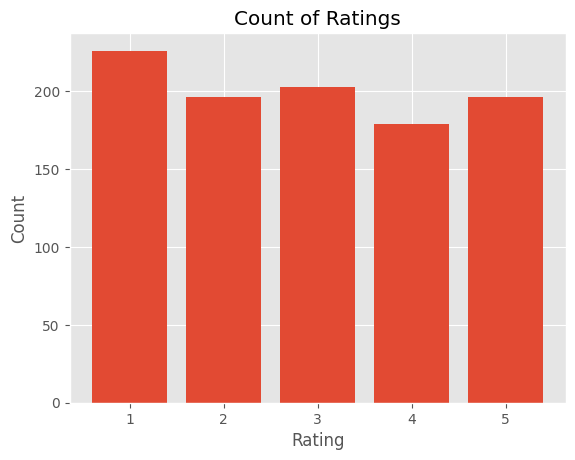

In [55]:
ratings = df.groupby('rating')['rating'].count() \
            .rename('count') \
            .reset_index()

print(ratings)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.bar(ratings['rating'], ratings['count'])

# add labels and title
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Count of Ratings")


### As we have book description, we could apply NLP technique

We can try to extract keywords from the text using `nltk` and `RAKE` library.

In [59]:
import RAKE
import re
import nltk # Natural Language Toolkit library
nltk.download('stopwords') # download list of stop words from the nltk corpus
from nltk.corpus import stopwords

def highlight_keywords(text, keywords):
    '''
        take two arguments, text and keywords in the list
        It surrounds keyword with <mark> tags.
    '''
    for keyword in keywords:
        text = re.sub(r'\b' + keyword + r'\b', '<mark>' + keyword + '</mark>', text, flags=re.IGNORECASE)
    return text


english_stop_words = stopwords.words("english")
french_stop_words = stopwords.words("french")

stopwords = english_stop_words + french_stop_words
# Create instance of the RAKE algorithm using the combination of english and french stopwords
rake = RAKE.Rake(stop_words = stopwords)

for i, row in df.iterrows(): #i: index, row: row iterrate over rows in df 
    keywords = rake.run(row['book_description']) # it returns tuple (keyword, score)
    keywords_only = [] # We only need keyword, not score
    for keyword in keywords:
        keywords_only.append(keyword[0]) # First tuple
    highlighted_text = highlight_keywords(row['book_description'], keywords_only)   
    # Below code is simpler way (for loop change to list comprehension)    
    # highlighted_text = highlight_keywords(row['book_description'], [keyword[0] for keyword in keywords])
    df.at[i, 'highlighted_description'] = highlighted_text    
# Note: apparently, if you want to access a single cell, df.at is fater than df.loc.     


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaygo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Check our output
display(HTML(df['highlighted_description'][50]))

We can see few book description to see what is their key words. At the moment, most of non stopwords are selected as a keywords. You can try improve this by changing parameters,  